## Imports

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate, learning_curve


## Dataset

- This is a reduced version of the Kaggle Houses dataset
- Each observation is a house with it's features
<br>
<br>
The target value is the Sale Price of the house. 

In [56]:
data = pd.read_csv('ML_Houses.csv')
df = data.copy()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GrLivArea     1460 non-null   float64
 1   BedroomAbvGr  1460 non-null   float64
 2   KitchenAbvGr  1460 non-null   float64
 3   OverallCond   1460 non-null   float64
 4   CentralAir    1460 non-null   int64  
 5   SalePrice     1460 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 68.6 KB


In [58]:
df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


## Baseline

Making a Linear Model as a baseline

In [59]:
X = df.drop(columns='SalePrice', axis=1)
y = df.SalePrice

model = LinearRegression()

In [60]:
cross_validate(model,X,y)['test_score'].mean()

0.5944790982110583

Making a simple KNN model as a baseline

In [61]:
knn_model = KNeighborsRegressor()

In [62]:
cross_validate(knn_model, X, y)['test_score'].mean()

0.6085640394084016

## Feature normalization

In [63]:
min_max_scaler = MinMaxScaler() 
min_max_scaler.fit(df[['GrLivArea']]) 
df['GrLivArea'] = min_max_scaler.transform(df[['GrLivArea']]) 

In [64]:
df.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.303208,0.375,0.333333,0.500,1,208500
1,0.223817,0.375,0.333333,0.875,1,181500
2,0.316676,0.375,0.333333,0.500,1,223500
3,0.304448,0.375,0.333333,0.500,1,140000
4,0.389686,0.500,0.333333,0.500,1,250000


In [65]:
df.describe()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.268607,0.358305,0.348858,0.571918,0.934932,180921.195890
std,0.093360,0.101972,0.073446,0.139100,0.246731,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.200337,0.250000,0.333333,0.500000,1.000000,129975.000000
50%,0.259614,0.375000,0.333333,0.500000,1.000000,163000.000000
75%,0.315036,0.375000,0.333333,0.625000,1.000000,214000.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,755000.000000


In [66]:
X_ = df.drop(columns='SalePrice', axis=1)
y_ = df.SalePrice

In [67]:
cross_validate(knn_model, X_, y_)['test_score'].mean()

0.6496841000103444

♦️ The normalization got the test score from 0.608 to 0.649

## Finding the best K parameter

In [68]:

scores = []
for i in range (1,25):
    scores.append(cross_validate(KNeighborsRegressor(n_neighbors=i), X_, y_)['test_score'].mean())
    
scores
    

[0.48643978631100937,
 0.6267417341431845,
 0.6361131968558427,
 0.6424218015704231,
 0.6496841000103444,
 0.6522754507028157,
 0.652839334921044,
 0.6519261906963425,
 0.6554831582849612,
 0.654649718853763,
 0.6571094901627201,
 0.6547622648461493,
 0.6559293474292767,
 0.6531144861475239,
 0.6506644507844749,
 0.6510587444798077,
 0.648992334002443,
 0.6468309968654011,
 0.6434622558331211,
 0.6426314978289545,
 0.641230517625335,
 0.6396124217700394,
 0.6379363773825212,
 0.6360964020468971]

In [69]:

scores = []
for i in range (1,25):
    scores.append(cross_validate(KNeighborsRegressor(n_neighbors=i), X_, y_)['test_score'].mean())
knn_scores = dict(zip(range(1,25), scores))
best_k = max(knn_scores, key=knn_scores.get)

best_k

11

Visualizing the scores for different K's

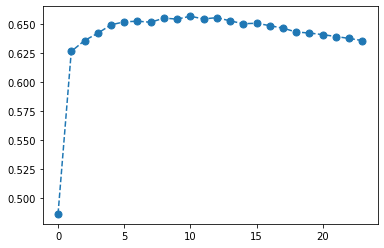

In [70]:
plt.plot(scores, linestyle='dashed', marker='o', markersize=7);


## Comparing the Learning Curve for different K parameters

### K = 2

Here we will set the n_neighbors parameter to 2

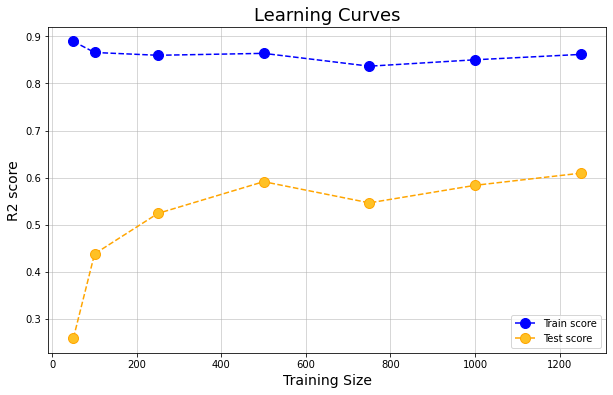

In [71]:
# Plot the learning curves

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=2),
                                                              X = X_, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")
    
    plt.show()


### K = 11 (best K)

Here we will use the best parameter that we found on our scores search

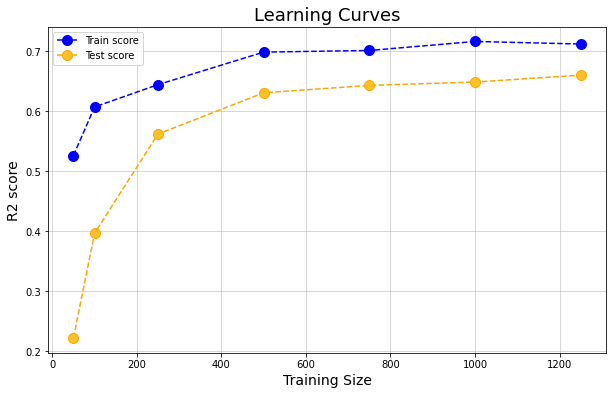

In [72]:
# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = KNeighborsRegressor(n_neighbors=best_k),
                                                              X = X_, 
                                                              y = y, 
                                                              train_sizes = [50,100,250,500,750,1000,1250], 
                                                              cv = 10,
                                                              scoring = 'r2')

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)


# Plot the learning curves

import matplotlib.pyplot as plt

with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(train_sizes, train_scores_mean, label = 'Train score',color='blue', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
    ax.plot(train_sizes, test_scores_mean, label = 'Test score',color='orange', linestyle='dashed', marker='o',markerfacecolor='#ffc125', markersize=10)
    # more
    ax.set_title('Learning Curves', fontsize = 18)
    ax.set_xlabel('Training Size', fontsize = 14)
    ax.set_ylabel('R2 score', fontsize = 14)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)
    ax.legend(loc="best")
    
    plt.show()
    
    
    

## Scoring

In [73]:
best_k_model = KNeighborsRegressor(n_neighbors=11)

In [74]:
cross_validate(best_k_model, X_, y_)['test_score'].mean()

0.6571094901627201

## Conclusion

The learning curve from the best parameter shows that the train score is high and the test score converges to it, and there are no signs of overfitting.

When comparing the scores:
- Linear regression: 0.608 
- Simple KNN model: 0.649
- KNN model with best K parameter: 0.657

<br>
<br>
The adjusted parameters have the best score. 